# Data Analysis

## Import the libraries

In [28]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [29]:
pd.options.mode.chained_assignment = None

---

## Step 1 : Data Cleaning

You have collected your data! So it's time to do a cleaning on it. A cleaned dataset is a dataset that doesn't contain any duplicates, is blank spaces or error-free. The rest of the analysis can be discarded if you neglect this step!

- No duplicates
- No blank spaces (ex: `" I love python "` => `"I love python"`)
- No errors
- No empty values


## Put the data into a table

In [30]:
df = pd.read_csv('csvfile.csv')
df

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1.0,1,1969.0,Belgium,Brugge,NaN,NaN,NaN,NaN,...,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6.0,13,1920.0,Belgium,Tournai,NaN,NaN,0.0,NaN,...,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,...,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1.0,4,NaN,Belgium,Veurne,NaN,NaN,NaN,1.0,...,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,...,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118709,https://www.immoweb.be/en/classified/house/for...,1.0,3,2024.0,Belgium,Gent,NaN,NaN,NaN,1.0,...,4.0,NaN,GOOD,house,234.0,NaN,NaN,0.0,1,residential_sale
118710,https://www.immoweb.be/en/classified/house/for...,4.0,4,NaN,Belgium,Antwerp,NaN,NaN,0.0,NaN,...,NaN,NaN,JUST_RENOVATED,apartment_block,202.0,NaN,NaN,NaN,1,residential_sale
118711,https://www.immoweb.be/en/classified/apartment...,1.0,2,NaN,Belgium,Antwerp,NaN,NON_FLOOD_ZONE,NaN,NaN,...,NaN,NaN,GOOD,apartment,NaN,0.0,1.0,1.0,2,residential_sale
118712,https://www.immoweb.be/en/classified/apartment...,1.0,2,NaN,Belgium,Brugge,NaN,POSSIBLE_FLOOD_ZONE,NaN,NaN,...,8.0,NaN,NaN,apartment,NaN,NaN,1.0,NaN,2,residential_sale


---

## Replace missing values



In [31]:

def no_null(df):    
    missing_percentage = df.isnull().mean() * 100

    for i in df.columns:
        if pd.api.types.is_bool_dtype(df[i]):
            df[i] = df[i].fillna(False)
        elif pd.api.types.is_integer_dtype(df[i]):
            df[i] = df[i].fillna(0)
        elif pd.api.types.is_float_dtype(df[i]):
            df[i] = df[i].fillna(0)
            df[i] = df[i].astype(int)
        else:
            df[i] = df[i].fillna("Unknown")
            
    return df, missing_percentage

not_nulled = no_null(df)
df = not_nulled[0]
df

print("Value missing :")
print(not_nulled[1])


Value missing :
Url                   0.000000
BathroomCount         8.088347
BedroomCount          0.000000
ConstructionYear     41.963037
Country               0.000000
District              0.005897
Fireplace            96.526947
FloodingZone         50.854996
Furnished            74.455414
Garden               81.044359
GardenArea           81.044359
Kitchen              43.448961
LivingArea           11.940462
Locality              0.004212
MonthlyCharges       88.501777
NumberOfFacades      35.187088
PEB                  28.337012
PostalCode            0.000000
Price                 0.000000
PropertyId            0.000000
Province              0.005897
Region                0.005897
RoomCount            72.272857
ShowerCount          51.878464
StateOfBuilding      31.244841
SubtypeOfProperty     0.000000
SurfaceOfPlot        50.943444
SwimmingPool         66.004010
Terrace              42.429705
ToiletCount          18.761898
TypeOfProperty        0.000000
TypeOfSale            0

---

## Drop Columns


In [32]:
df=df.drop(columns=['Country', 'Province', 'MonthlyCharges'])
df

,Url,BathroomCount,BedroomCount,ConstructionYear,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,0,Unknown,0,0,0,...,1,0,GOOD,flat_studio,0,0,1,1,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6,13,1920,Tournai,0,Unknown,0,0,0,...,31,0,GOOD,apartment_block,130,0,0,5,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,0,NON_FLOOD_ZONE,1,0,0,...,0,0,GOOD,house,0,0,0,2,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1,4,0,Veurne,0,Unknown,0,1,1,...,0,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Hasselt,0,NON_FLOOD_ZONE,0,0,0,...,1,0,AS_NEW,apartment,0,0,1,1,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118709,https://www.immoweb.be/en/classified/house/for...,1,3,2024,Gent,0,Unknown,0,1,168,...,4,0,GOOD,house,234,0,0,0,1,residential_sale
118710,https://www.immoweb.be/en/classified/house/for...,4,4,0,Antwerp,0,Unknown,0,0,0,...,0,0,JUST_RENOVATED,apartment_block,202,0,0,0,1,residential_sale
118711,https://www.immoweb.be/en/classified/apartment...,1,2,0,Antwerp,0,NON_FLOOD_ZONE,0,0,0,...,0,0,GOOD,apartment,0,0,1,1,2,residential_sale
118712,https://www.immoweb.be/en/classified/apartment...,1,2,0,Brugge,0,POSSIBLE_FLOOD_ZONE,0,0,0,...,8,0,Unknown,apartment,0,0,1,0,2,residential_sale


---

## Drop Duplicates


In [33]:
df=df.drop_duplicates(subset=['BedroomCount','District','Price','Garden','GardenArea','RoomCount','SurfaceOfPlot','TypeOfSale'], keep='first')
df


,Url,BathroomCount,BedroomCount,ConstructionYear,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,0,Unknown,0,0,0,...,1,0,GOOD,flat_studio,0,0,1,1,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6,13,1920,Tournai,0,Unknown,0,0,0,...,31,0,GOOD,apartment_block,130,0,0,5,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,0,NON_FLOOD_ZONE,1,0,0,...,0,0,GOOD,house,0,0,0,2,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1,4,0,Veurne,0,Unknown,0,1,1,...,0,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Hasselt,0,NON_FLOOD_ZONE,0,0,0,...,1,0,AS_NEW,apartment,0,0,1,1,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118704,https://www.immoweb.be/en/classified/house/for...,3,7,0,Tournai,0,Unknown,0,0,0,...,0,0,GOOD,house,6710,0,1,2,1,residential_sale
118706,https://www.immoweb.be/en/classified/apartment...,1,1,1971,Mouscron,0,Unknown,0,0,0,...,0,1,GOOD,apartment,0,0,0,1,2,residential_monthly_rent
118707,https://www.immoweb.be/en/classified/house/for...,0,0,0,Kortrijk,0,NON_FLOOD_ZONE,0,1,1,...,0,0,TO_RENOVATE,farmhouse,10703,0,0,0,1,residential_sale
118708,https://www.immoweb.be/en/classified/apartment...,1,1,2017,Tongeren,0,Unknown,0,0,0,...,0,0,GOOD,service_flat,0,0,1,1,2,residential_sale


---

## No blank spaces


In [34]:
for i in df.columns:
    df[i] = df[i].apply(lambda x: x.strip() if isinstance(x, str) else x)
df

,Url,BathroomCount,BedroomCount,ConstructionYear,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Brugge,0,Unknown,0,0,0,...,1,0,GOOD,flat_studio,0,0,1,1,2,residential_sale
1,https://www.immoweb.be/en/classified/house/for...,6,13,1920,Tournai,0,Unknown,0,0,0,...,31,0,GOOD,apartment_block,130,0,0,5,1,residential_sale
2,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Brugge,0,NON_FLOOD_ZONE,1,0,0,...,0,0,GOOD,house,0,0,0,2,1,residential_sale
3,https://www.immoweb.be/en/classified/house/for...,1,4,0,Veurne,0,Unknown,0,1,1,...,0,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
4,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Hasselt,0,NON_FLOOD_ZONE,0,0,0,...,1,0,AS_NEW,apartment,0,0,1,1,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118704,https://www.immoweb.be/en/classified/house/for...,3,7,0,Tournai,0,Unknown,0,0,0,...,0,0,GOOD,house,6710,0,1,2,1,residential_sale
118706,https://www.immoweb.be/en/classified/apartment...,1,1,1971,Mouscron,0,Unknown,0,0,0,...,0,1,GOOD,apartment,0,0,0,1,2,residential_monthly_rent
118707,https://www.immoweb.be/en/classified/house/for...,0,0,0,Kortrijk,0,NON_FLOOD_ZONE,0,1,1,...,0,0,TO_RENOVATE,farmhouse,10703,0,0,0,1,residential_sale
118708,https://www.immoweb.be/en/classified/apartment...,1,1,2017,Tongeren,0,Unknown,0,0,0,...,0,0,GOOD,service_flat,0,0,1,1,2,residential_sale


---
## Remplace 0 and 1 value by Flase and True


In [35]:
def replace_0_1_with_bool(df, columns):
    for column in columns:
        df[column] = df[column].replace({0: False, 1: True})
    return df
 
boolean_columns = ['Fireplace', 'FloodingZone', 'Furnished', 'Garden', 'SwimmingPool', 'Terrace']
df_not_nulled = replace_0_1_with_bool(df, boolean_columns)

C:\Users\HP-Omen\AppData\Local\Temp\ipykernel_16200\704921155.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({0: False, 1: True})


---

## Remove outliers


In [36]:
df['NumberOfFacades'] = df['NumberOfFacades'].apply(lambda x: 4 if x >= 4 else x)

df = df[
    (df['PostalCode'] >= 1000) & (df['PostalCode'] <= 9999) &
    (df['Price'] > 0) & (df['Price'] < 15000000) &  
    (df['LivingArea'] > 0) & (df['LivingArea'] < 10000) &
    (df['BathroomCount'] <= df['BedroomCount']) &
    (df['ConstructionYear'] <= datetime.date.today().year + 10) &
    (df['NumberOfFacades'] <= 4) &
    (df['ShowerCount'] <= df['BathroomCount']) &
    (df['TypeOfSale'] != "annuity_monthly_amount") &
    (df['TypeOfSale'] != "annuity_without_lump_sum") &
    (df['TypeOfSale'] != "annuity_lump_sum")
]

df['TypeOfSale'] = df['TypeOfSale'].replace('residential_sale', 1)
df['TypeOfSale'] = df['TypeOfSale'].replace('residential_monthly_rent', 2)  


df = df[df['TypeOfSale'] == 1]


C:\Users\HP-Omen\AppData\Local\Temp\ipykernel_16200\3105662391.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['TypeOfSale'] = df['TypeOfSale'].replace('residential_monthly_rent', 2)



### Step 2 : Data Analysis

Now that the data has been collected and cleaned, it is time for the analysis. How many variables and inputs do you have? And so on...

Use the tools such as `matplotlib`/`seaborn`/`plotly`!

In [37]:

print("======================")
print(f"Nb of line : {len(df.index)}")
print(f"Nb of columns : {len(df.columns)}")

print("======================")

Nb of line : 63336
Nb of columns : 29


### Generic Function

In [38]:
def format_column_name(name):
    if isinstance(name, str):
        return name.replace('_', ' ').title()
    else:
        return name

def plot_generic(ax, df, column, title, xlabel, ylabel, color, categories=None, remove_unknown=True):
    if remove_unknown:
        df = df[df[column] != 'Unknown']
    
    df_grouped = df.groupby(column)['Price'].median()
    
    if categories:
        df[column] = pd.Categorical(df[column], categories=categories, ordered=True)
        df_grouped = df_grouped.reindex(categories)
    else:
        df_grouped = df_grouped.sort_values(ascending=True)

    df_grouped.index = [format_column_name(name) for name in df_grouped.index]

    df_grouped.plot(kind='bar', color=color, edgecolor='black', ax=ax)

    ax.set_title(title, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=8)
    ax.set_ylabel(ylabel, fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.2)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
    ax.tick_params(axis='x', which='major', labelsize=8)
    

## Condition and Construction

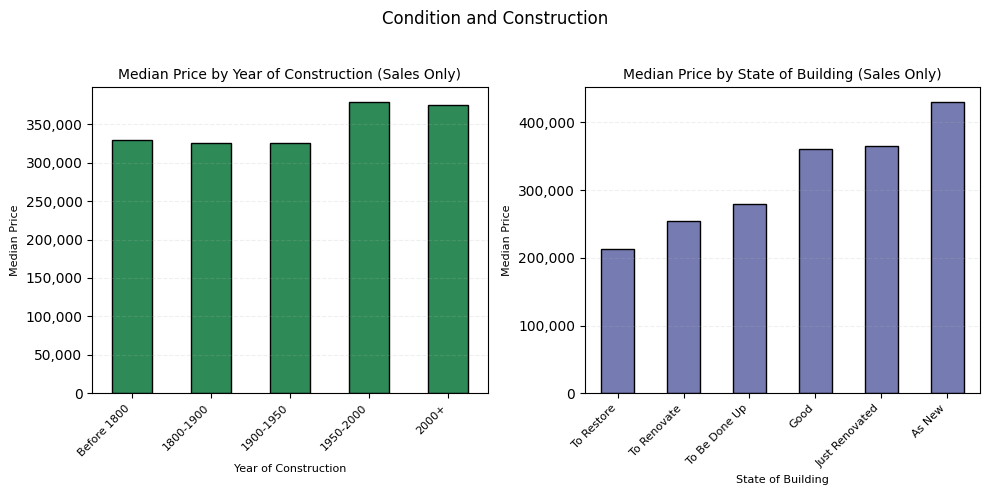

In [39]:
def categorize_construction_year(year):
    if year < 1799:
        return 'Before 1800'
    elif year <= 1900:
        return '1800-1900'
    elif year <= 1950:
        return '1900-1950'
    elif year <= 2000:
        return '1950-2000'
    else:
        return '2000+'

df['ConstructionYearCategory'] = df['ConstructionYear'].apply(categorize_construction_year)


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Condition and Construction', fontsize=12)

plot_generic(axs[0], df, 'ConstructionYearCategory', 'Median Price by Year of Construction (Sales Only)', 'Year of Construction', 'Median Price', '#2e8b57', ['Before 1800', '1800-1900', '1900-1950', '1950-2000', '2000+'])
plot_generic(axs[1], df, 'StateOfBuilding', 'Median Price by State of Building (Sales Only)', 'State of Building', 'Median Price', '#767bb2')

fig.tight_layout(rect=[0, 0, 1, 0.96])  

plt.show()

---

### Other Characteristics



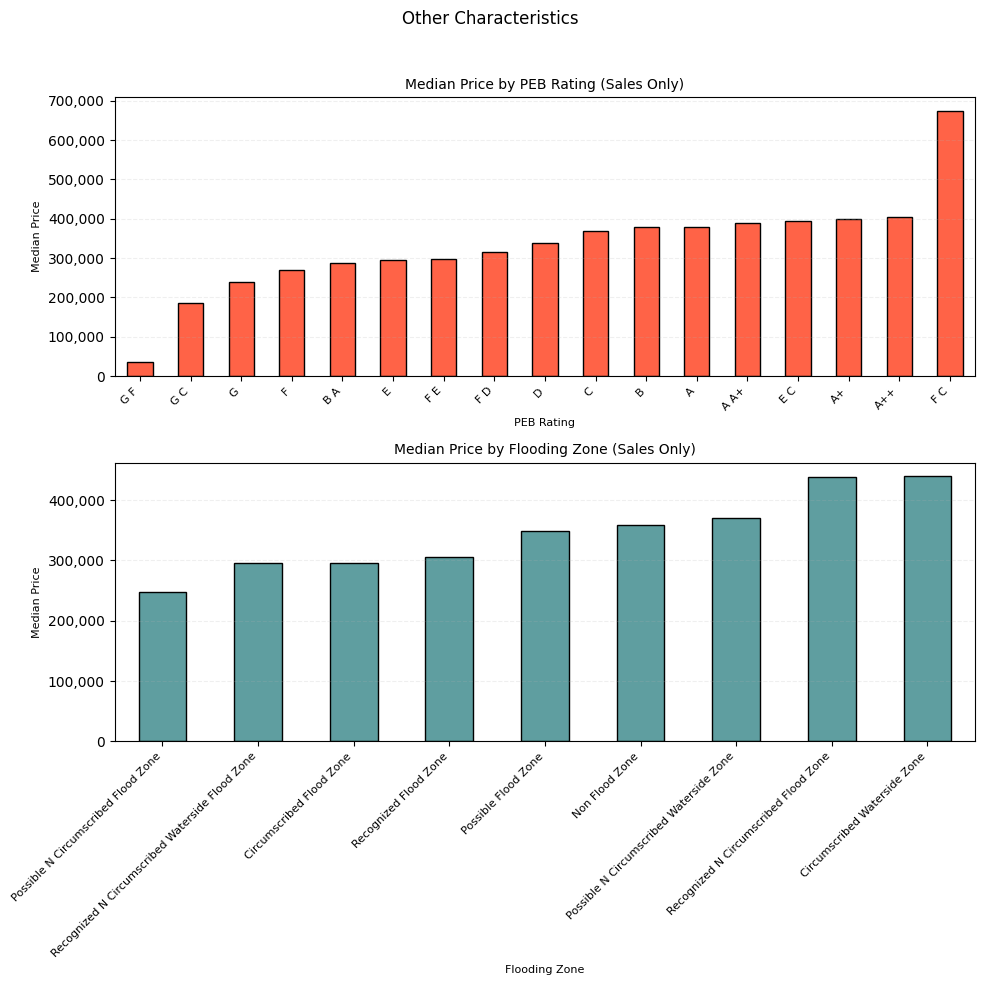

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
fig.suptitle('Other Characteristics', fontsize=12)

plot_generic(axs[0], df, 'PEB', 'Median Price by PEB Rating (Sales Only)', 'PEB Rating', 'Median Price', '#ff6347')
plot_generic(axs[1], df, 'FloodingZone', 'Median Price by Flooding Zone (Sales Only)', 'Flooding Zone', 'Median Price', '#5F9EA0')

fig.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()

--- 

### Price by Areas

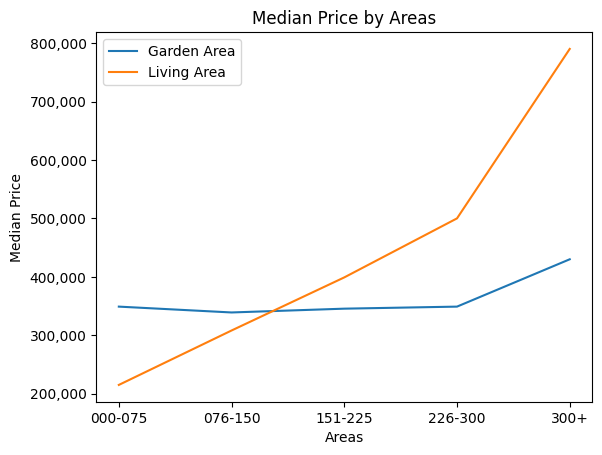

In [41]:
def categorize_livingArea(livingArea):
    categories=[]
    for area_count in livingArea:
        if area_count >= 0 and area_count <= 75:
            categories.append('000-075')
        elif area_count >= 76 and area_count <= 150:
            categories.append('076-150')
        elif area_count >= 151 and area_count <= 225:
            categories.append('151-225')
        elif area_count >= 226 and area_count <= 300:
            categories.append('226-300')
        else:
            categories.append('300+')
    return categories

def categorize_gardenArea(gardenArea):
    categories=[]
    for garden_count in gardenArea:
        if garden_count >= 0 and garden_count <= 75:
            categories.append('000-075')
        elif garden_count >= 76 and garden_count <= 150:
            categories.append('076-150')
        elif garden_count >= 151 and garden_count <= 225:
            categories.append('151-225')
        elif garden_count >= 226 and garden_count <= 300:
            categories.append('226-300')
        else:
            categories.append('300+')
    return categories


ordered = ['000-075', '076-150', '151-225', '226-300', '300+']

df['LivingAreaCategory'] = categorize_livingArea(df['LivingArea'])
df['GardenAreaCategory'] = categorize_gardenArea(df['GardenArea'])


garden = df.groupby("GardenAreaCategory")['Price'].median().sort_index()
living = df.groupby("LivingAreaCategory")['Price'].median().sort_index()

fig, ax = plt.subplots()
ax.plot(garden.index, garden.values, label="Garden Area")
ax.plot(living.index, living.values, label="Living Area")

ax.set_xlabel('Areas')
ax.set_ylabel('Median Price')
ax.set_title('Median Price by Areas')
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()



---

### Price by Rooms


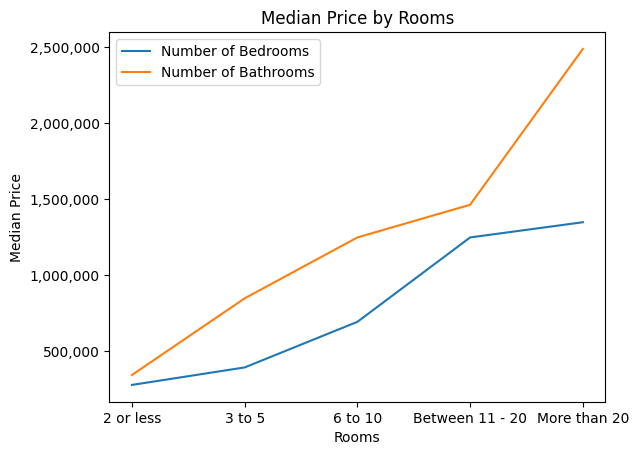

In [42]:
def categorize_number_bedrooms(bedrooms):
    categories=[]
    for bedroom_count in bedrooms:
        if bedroom_count >= 0 and bedroom_count <= 2:
            categories.append('2 or less')
        elif bedroom_count >= 3 and bedroom_count <= 5:
            categories.append('3 to 5')
        elif bedroom_count >= 6 and bedroom_count <= 10:
            categories.append('6 to 10')
        elif bedroom_count >= 11 and bedroom_count <= 20:
            categories.append('Between 11 - 20')
        else:
            categories.append('More than 20')
    return categories
    


def categorize_number_bathrooms(bathrooms):
    categories=[]
    for bathroom_count in bathrooms:
        if bathroom_count >= 0 and bathroom_count <= 2:
            categories.append('2 or less')
        elif bathroom_count >= 3 and bathroom_count <= 5:
            categories.append('3 to 5')
        elif bathroom_count >= 6 and bathroom_count <= 10:
            categories.append('6 to 10')
        elif bathroom_count >= 11 and bathroom_count <= 20:
            categories.append('Between 11 - 20')
        else:
            categories.append('More than 20')
    return categories


df['BedroomsCategory'] = categorize_number_bedrooms(df['BedroomCount'])
df['BathroomsCategory'] = categorize_number_bathrooms(df['BathroomCount'])


bedrooms = df.groupby("BedroomsCategory")['Price'].median().sort_index()
bathrooms = df.groupby("BathroomsCategory")['Price'].median().sort_index()

fig, ax = plt.subplots()
ax.plot(bedrooms.index, bedrooms.values, label="Number of Bedrooms")
ax.plot(bathrooms.index, bathrooms.values, label="Number of Bathrooms")

ax.set_xlabel('Rooms')
ax.set_ylabel('Median Price')
ax.set_title('Median Price by Rooms')
ax.legend()

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.show()


---

### Heatmap



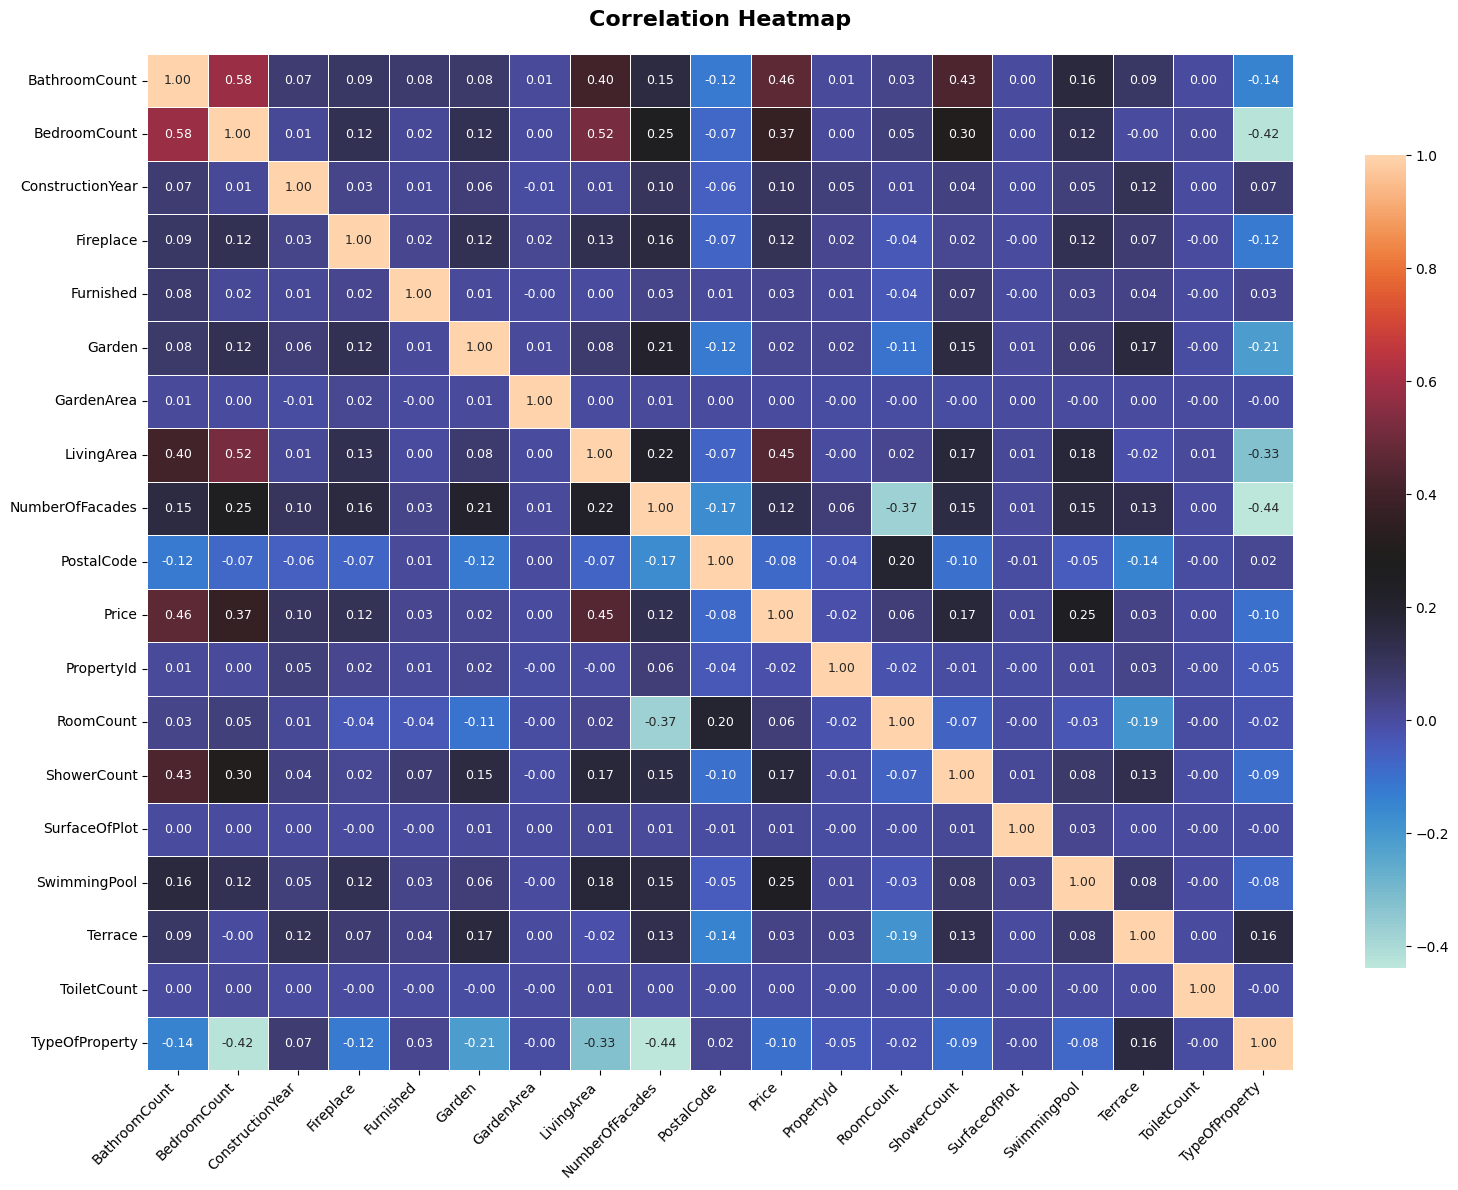

In [43]:
df=df.drop(columns="TypeOfSale")
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'bool']).columns
data = df[numeric_cols].drop(columns=[], errors='ignore')

corr_matrix = data.corr(method='pearson')

plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(
    corr_matrix, 
    cmap='icefire', 
    annot=True, 
    fmt=".2f", 
    linewidths=.5, 
    cbar_kws={"shrink": .8}, 
    annot_kws={"size": 10}
)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 16, 'fontweight': 'bold'}, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

for text in heatmap.texts:
    text.set_size(9)

plt.tight_layout()

plt.show()

---

## Step 4: Data Interpretation

###  What are the most and less expensive districts in Belgium?

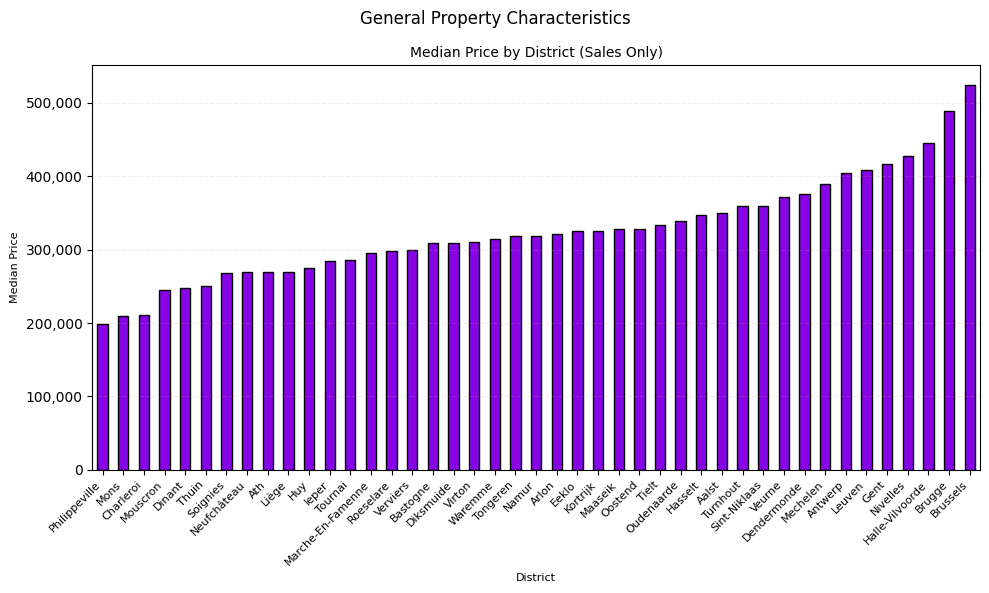

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('General Property Characteristics', fontsize=12)

plot_generic(ax, df, 'District', 'Median Price by District (Sales Only)', 'District', 'Median Price', '#8705e4')

plt.tight_layout()
plt.show()

### What are the most expensive and less expensive district in Wallonia?

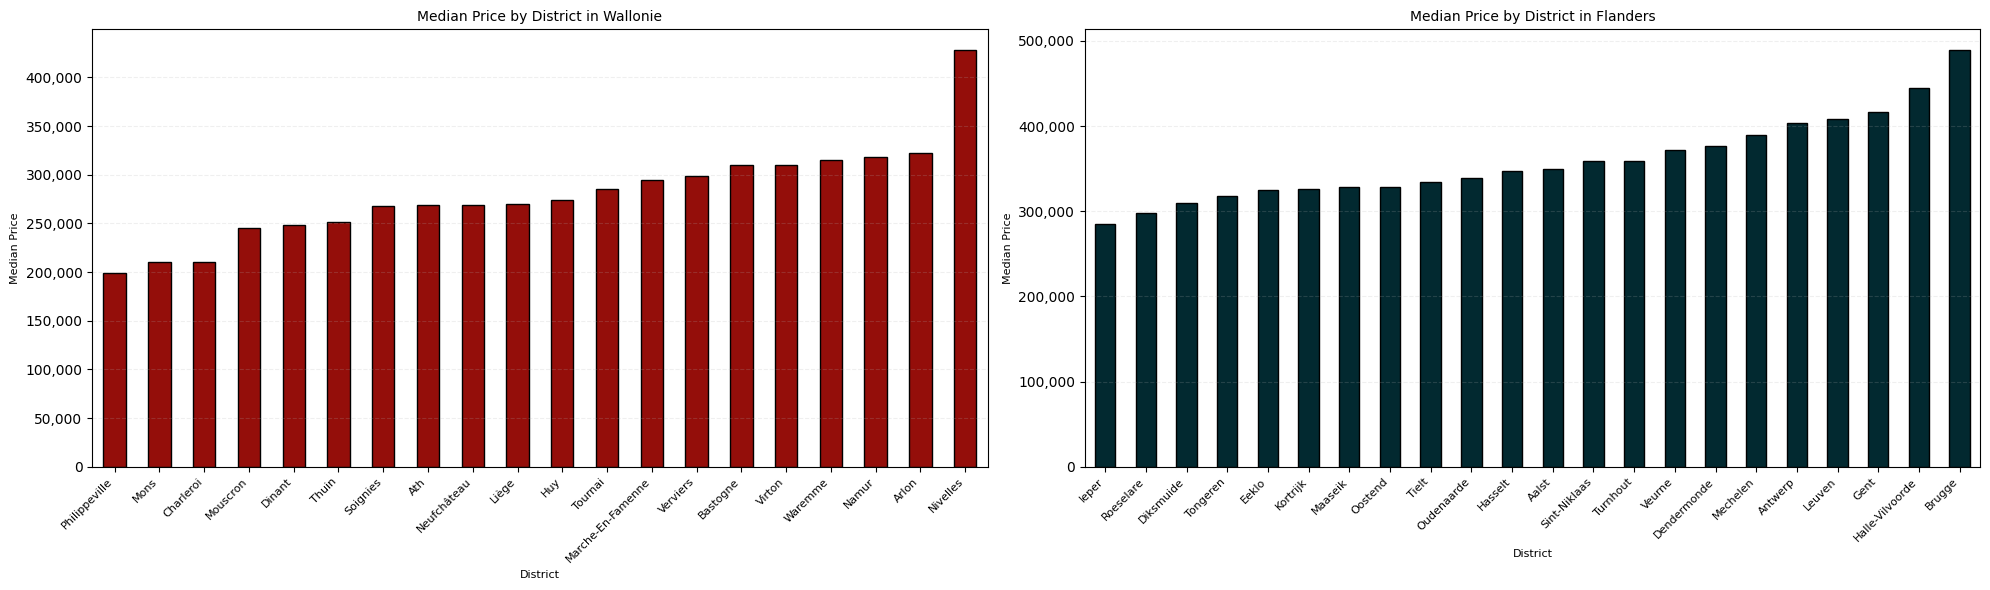

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

df_wallonie = df[df['Region'] == 'Wallonie']
plot_generic(axs[0], df_wallonie, 'District', 'Median Price by District in Wallonie', 'District', 'Median Price', '#940e0a')

df_flanders = df[df['Region'] == 'Flanders']    
plot_generic(axs[1], df_flanders, 'District', 'Median Price by District in Flanders', 'District', 'Median Price', '#022930')

plt.tight_layout()
plt.show()